### Project Description

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. 
<br>The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
<br>The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

#### Steps - Followed

* Problem Statement
* Hypothesis Generation
* Loading Packages and Data
* Data Structure and Content
* Exploratory Data Analysis
* Univariate Analysis
* Bivariate Analysis
* Missing Value Treatment
* Feature Engineering
* Encoding Categorical Variables
* Label Encoding
* One Hot Encoding
* PreProcessing Data
* Modeling
* Linear Regression
* Regularized Linear Regression
* RandomForest
* XGBoost
* Summary

<hr>

### Loading Packages and Data

In [8]:
# Importing the required libraries
import pandas as pd

In [9]:
data=pd.read_csv("Train.csv")

In [10]:
data.head(6)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


<hr>

### Data Structure and Content

In [11]:
type(data)

pandas.core.frame.DataFrame

In [12]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

* Item_Identifier : Unique product ID
* Item_Weight : Weight of product
* Item_Fat_Content : Whether the product is low fat or not
* Item_Visibility : % of total display area in store allocated to this product
* Item_Type : Category to which product belongs
* Item_MRP : Maximum Retail Price (list price) of product
* Outlet_Identifier : Unique store ID
* Outlet_Establishment_Year : Year in which store was established
* Outlet_Size : Size of the store
* Outlet_Location_Type : Type of city in which store is located
* Outlet_Type : Grocery store or some sort of supermarket
* Item_Outlet_Sales : Sales of product in particular store. This is the outcome variable to be predicted.

<hr>

### EDA

In [13]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data.shape

(8523, 12)

Exploring attributes in dataset

In [15]:
data["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [16]:
data["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [17]:
data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [18]:
sum(data.duplicated())

0

In [19]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are missing values in our datasets

In [20]:
duplicate=data.duplicated()
duplicate.sum()

0

There are no duplicates in our datasets

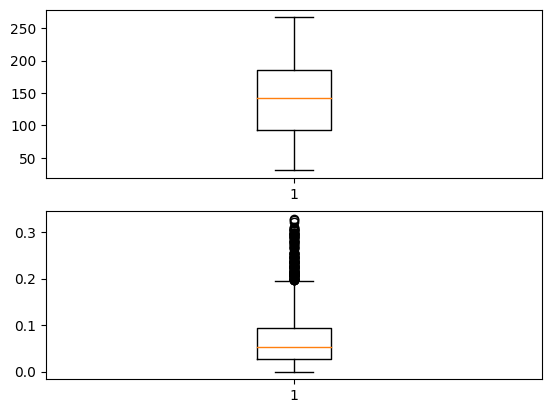

In [21]:
fig, ax = plt.subplots(2, 1)

ax[0].boxplot(data["Item_MRP"])
ax[1].boxplot(data["Item_Visibility"])

plt.show()

There are outliers in our data

<hr>

### Missing Values

In [22]:
data=pd.read_csv("Train.csv")

In [23]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [24]:
# Handling the missing values in Item_Weight attribute
data["Item_Weight"].dtype

dtype('float64')

In [25]:
# As Item_Weight is a continous attribute, 
# we can replace the missing values with mean

data["Item_Weight"] = data["Item_Weight"].fillna(data["Item_Weight"].mean())
data["Item_Weight"].isnull().sum()

0

In [26]:
# Handling the missing values in Outlet_Size attribute
data["Outlet_Size"].head(3)

0    Medium
1    Medium
2    Medium
Name: Outlet_Size, dtype: object

In [27]:
# Outlet_Size is a categorical attribute,
# replacing the null values with missing value
data["Outlet_Size"] = data["Outlet_Size"].fillna(str(data["Outlet_Size"].mode()))
data["Outlet_Size"].isnull().sum()

0

In [28]:
# data = data.dropna(subset=["Outlet_Size"])

In [29]:
# For the above feature 0 does not make sense : therefore we have to handle these missing values

# As Item_Visibility is a continous attribute, 
# we can replace the '0' values with mean

data['Item_Visibility'] = data['Item_Visibility'].replace(0,data['Item_Visibility'].mean())
data["Item_Visibility"].value_counts()

0.066132    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

<hr>

### Feature Engineering

In [30]:
data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [31]:
# Here LF satnds for Low Fat and reg stands for Regular

# Replacing LF with Low Fat, reg Regular, low fat with Low Fat
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
data["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<hr>

### Univariate Analysis

Item_Weight

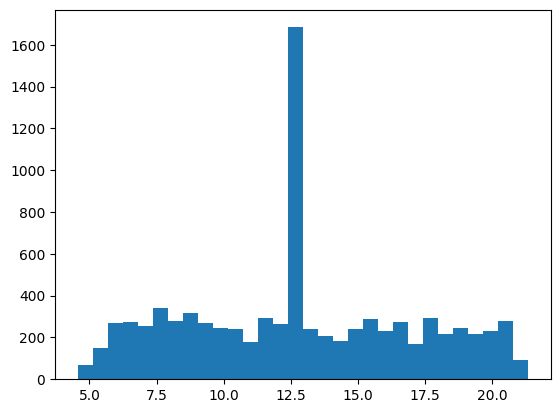

In [32]:
plt.hist(x = 'Item_Weight',data = data,bins = 30)
plt.rc("axes.spines", top=False, right=False)

Indicates the presence of outliers

Item_Fat_Content

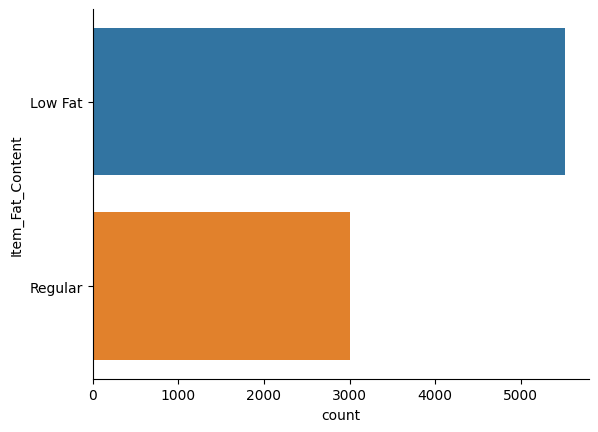

In [33]:
sns.countplot(y = 'Item_Fat_Content', data = data)
sns.despine()

Item_Visibility

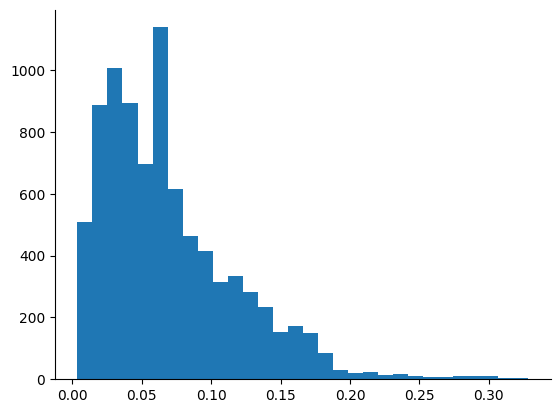

In [34]:
plt.hist(x = 'Item_Visibility',data = data,bins = 30)
plt.rc("axes.spines", top=False, right=False)

Left skewed: Item visibility is high in range of 0.01 to 0.1

Item_Type

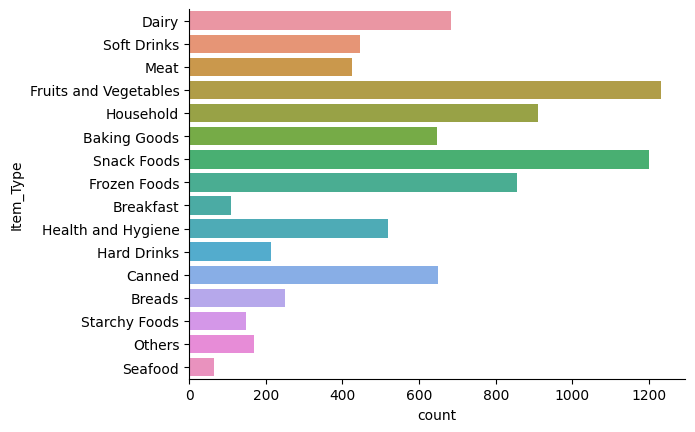

In [35]:
sns.countplot(y = 'Item_Type', data = data)
sns.despine()

Quantity of seafood item is the least.The quantity of 'Fruits and Vegetables' and 'Snack Foods' are very high.
So we can infer that the items having large qauntites of stock are consumed highly.

Item_MRP

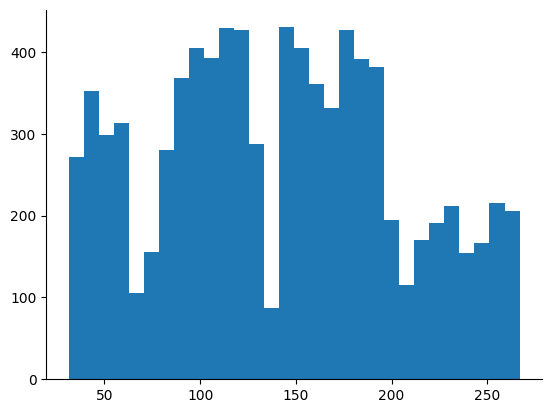

In [36]:
plt.hist(x = 'Item_MRP',data = data,bins = 30)
plt.rc("axes.spines", top=False, right=False)

data is unevenly distributed

Outlet_Establishment_Year

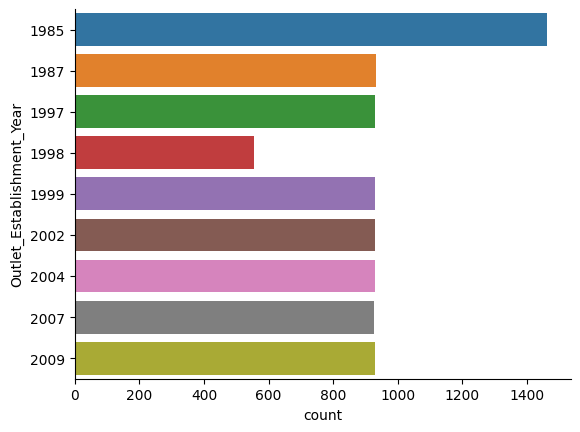

In [37]:
sns.countplot(y = 'Outlet_Establishment_Year', data = data)
sns.despine()

Most number of Stores were established in the year 1985.
Every year from 1985-2009 the number of stores established are same except in 1985 and 1988.

Outlet_Size

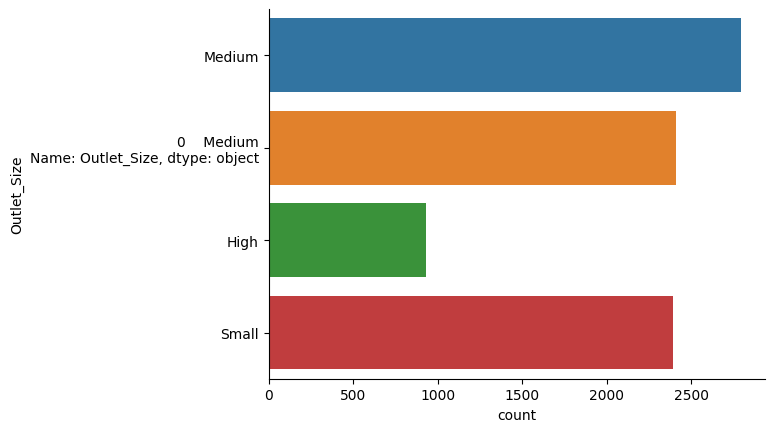

In [38]:
sns.countplot(y="Outlet_Size", data=data)
sns.despine()

There are many missing values in the dataset.
Comparitively there are more medium and small sized stores in number.

Outlet_Location_Type

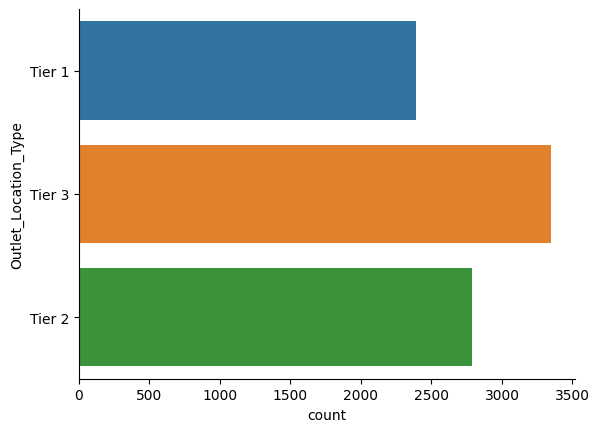

In [39]:
sns.countplot(y = 'Outlet_Location_Type', data = data)
sns.despine()

Tier 1 locations have the least number of stores comparitively.

Outlet_Type

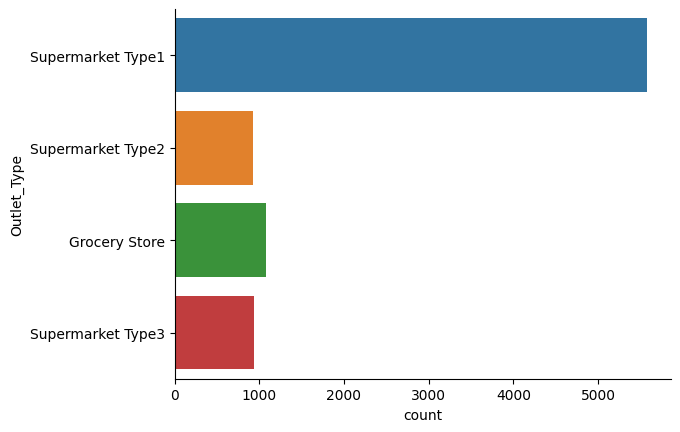

In [40]:
sns.countplot(y = 'Outlet_Type', data = data)
sns.despine()

There are number of stores of Supermarket Type 1 is high

<hr>

### Bi Variate Analysis

In [41]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017450,0.024756,-0.008301,0.011550
Item_Visibility,-0.017450,1.000000,-0.005259,-0.078355,-0.134138
Item_MRP,0.024756,-0.005259,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.078355,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.134138,0.567574,-0.049135,1.000000


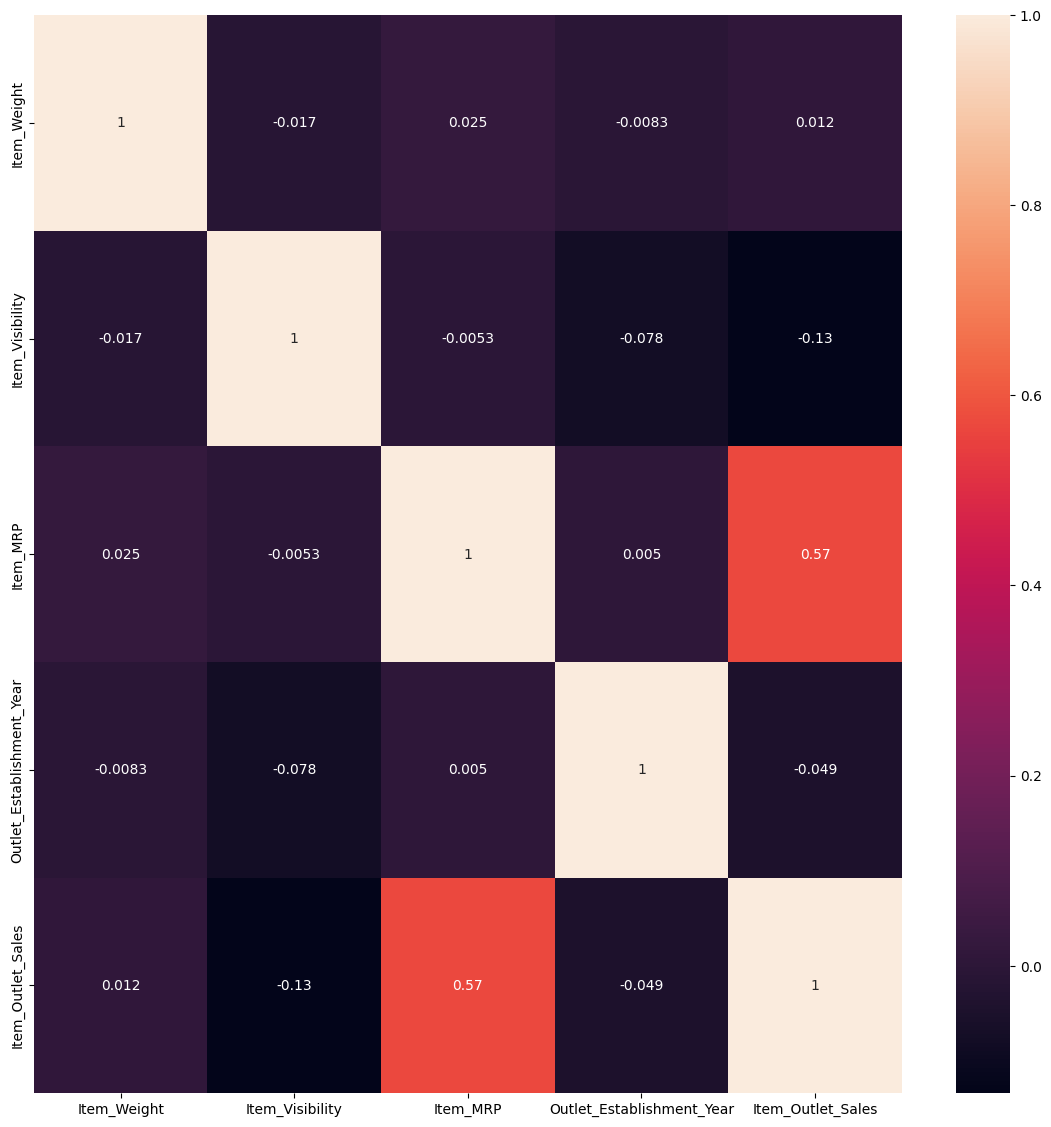

In [42]:
plt.figure(figsize =(14,14))
sns.heatmap(data.corr(),annot=True)
plt.show()

<hr>

### Encoding categorical to numerical


In [43]:
# Importing the required libary

from sklearn import preprocessing

In [44]:

le = preprocessing.LabelEncoder()

li = ['Outlet_Type','Outlet_Location_Type','Outlet_Size','Item_Fat_Content','Outlet_Identifier']
for i in li:
    data[i] = le.fit_transform(data[i])
    

In [45]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,9,1999,2,0,1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,3,2009,2,2,2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,9,1999,2,0,1,2097.2700
3,FDX07,19.20,1,0.066132,Fruits and Vegetables,182.0950,0,1998,0,2,0,732.3800
4,NCD19,8.93,0,0.066132,Household,53.8614,1,1987,1,2,1,994.7052


Creating dummy columns for the column Outlet_Identifier and drop the columns which are not required for our training purpose along with the label column for obvious reason

In [46]:
dum = pd.get_dummies(data['Outlet_Identifier'])
df1 = pd.concat([data,dum],axis=1)

label = df1['Item_Outlet_Sales']

train = df1.drop(columns=['Item_Identifier','Item_Weight','Item_Outlet_Sales','Item_Type','Outlet_Establishment_Year'])

In [47]:
train

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,0,1,2,3,4,5,6,7,8,9
0,0,0.016047,249.8092,9,2,0,1,0,0,0,0,0,0,0,0,0,1
1,1,0.019278,48.2692,3,2,2,2,0,0,0,1,0,0,0,0,0,0
2,0,0.016760,141.6180,9,2,0,1,0,0,0,0,0,0,0,0,0,1
3,1,0.066132,182.0950,0,0,2,0,1,0,0,0,0,0,0,0,0,0
4,0,0.066132,53.8614,1,1,2,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0.056783,214.5218,1,1,2,1,0,1,0,0,0,0,0,0,0,0
8519,1,0.046982,108.1570,7,0,1,1,0,0,0,0,0,0,0,1,0,0
8520,0,0.035186,85.1224,6,3,1,1,0,0,0,0,0,0,1,0,0,0
8521,1,0.145221,103.1332,3,2,2,2,0,0,0,1,0,0,0,0,0,0


<hr>

### Model Building

In [48]:
# Importing Required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

In [49]:
train.columns

Index([    'Item_Fat_Content',      'Item_Visibility',             'Item_MRP',
          'Outlet_Identifier',          'Outlet_Size', 'Outlet_Location_Type',
                'Outlet_Type',                      0,                      1,
                            2,                      3,                      4,
                            5,                      6,                      7,
                            8,                      9],
      dtype='object')

In [50]:
train=train.drop(["Outlet_Identifier"],axis=1)

In [51]:
x_train , x_test , y_train , y_test = train_test_split(train , label , test_size = 0.40,random_state = 101)

Linear Regression

In [52]:
reg = LinearRegression()
reg.fit(x_train,y_train)

C:\Users\Teju\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [53]:
reg.score(x_test,y_test)

C:\Users\Teju\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.5680699358011243

Laaso regression

In [54]:
LS=Lasso(alpha=0.05)
LS.fit(x_train,y_train)

C:\Users\Teju\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Lasso(alpha=0.05)

In [55]:
LS.score(x_test,y_test)

C:\Users\Teju\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.5681122502582957

GradientBoostingRegressor

In [56]:
grad = GradientBoostingRegressor(n_estimators = 100)
grad.fit(x_train,y_train)

C:\Users\Teju\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


GradientBoostingRegressor()

In [57]:
grad.score(x_test, y_test)

C:\Users\Teju\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.602958760191276

RandomForestRegressor

In [58]:
ran = RandomForestRegressor(n_estimators = 50)
ran.fit(x_train,y_train)

C:\Users\Teju\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestRegressor(n_estimators=50)

In [59]:
ran.score(x_test, y_test)

C:\Users\Teju\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.5511873047198412

<hr>

### Conclusion

The first model we use is Linear Regression
score : 0.57

The second model we use is Lasso Regression
score : 0.57

The third model we use is GradientBoostingRegressor
score : 0.60

The fourth model used is RandomForestRegressor
accuracy : 0.55

From the above three models which have been used for analysis we find that GradientBoostingRegressor is the best among the four. 

In [60]:
# Saving the model
from joblib import Parallel, delayed
import joblib
  
# Save the model as a pickle in a file
joblib.dump(grad, 'model.pkl')

['model.pkl']

<hr>

### Predicting on test data 

In [82]:
test=pd.read_csv("Test.csv")

In [83]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [84]:
li = ['Outlet_Type','Outlet_Location_Type','Outlet_Size','Item_Fat_Content','Outlet_Identifier']
for i in li:
    test[i] = le.fit_transform(test[i])
    

In [85]:
dum = pd.get_dummies(test['Outlet_Identifier'])
df1 = pd.concat([test,dum],axis=1)

test = df1.drop(columns=['Item_Identifier','Outlet_Identifier','Item_Weight','Item_Type','Outlet_Establishment_Year'])

In [87]:
test.head()

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,0,1,2,3,4,5,6,7,8,9
0,1,0.007565,107.8622,1,0,1,0,0,0,0,0,0,0,0,0,1
1,4,0.038428,87.3198,3,1,1,0,0,1,0,0,0,0,0,0,0
2,1,0.099575,241.7538,3,2,0,1,0,0,0,0,0,0,0,0,0
3,1,0.015388,155.0340,3,1,1,0,0,1,0,0,0,0,0,0,0
4,2,0.118599,234.2300,1,2,3,0,0,0,0,0,1,0,0,0,0


In [88]:
model_from_joblib = joblib.load('model.pkl')
  
# Use the loaded model to make predictions
y_pred=model_from_joblib.predict(test)

C:\Users\Teju\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [89]:
y_pred

array([1638.99877597, 1418.49323709,  641.71086711, ..., 1867.85711808,
       4140.99745383, 1555.56045698])

In [91]:
pred=pd.DataFrame(y_pred,columns=["Sales"])
pred.head()

,Sales
0,1638.998776
1,1418.493237
2,641.710867
3,2752.727090
4,5940.244832


In [92]:
# Saving the predictions in csv file
pred.to_csv("Predictions.csv")

<hr>